#### Group 29
Assignment 8 | Author: Yash Kumar Sahu | Roll No: CED19I039  
Assignment 8 | Author: Radhika Mittal | Roll No: CED19I050  
Assignment 8 | Author: Deep Patel | Roll No: ME21D0004

In [2]:
from matplotlib import pyplot as plt                                              
import cv2
import glob
import os
import numpy as np
import ntpath
import math
import cmath

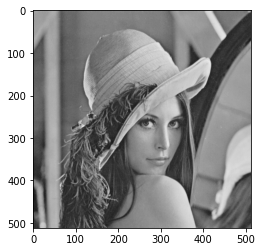

In [3]:
cwd = os.getcwd()                                            # get current directory
img = cv2.imread(cwd+"/Lena.png") 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)             # Convert to grayscale
#gray_img=gray_img[80:85,80:85]
plt.imshow(gray_img, cmap='gray', vmin = 0, vmax = 255)

In [4]:
def FFT_1D(f_signal):
    m=len(f_signal)

    if m-1==0:
        return DFT_1D(f_signal[0:1])
    else:    
           
       
       even = f_signal[0::2]
       odd  = f_signal[1::2]
      
       G=(FFT_1D(even)).copy()
       H=(FFT_1D(odd)).copy()
       
       F_signal=[]

       for u in range(0,int(m/2)):
         F1=G[u]+cmath.exp(complex(0,-(2*math.pi*u)/m))*H[u]
         F_signal.append(F1)
       for u in range(math.floor(m/2),m):
           F2=G[u-math.floor(m/2)]-cmath.exp(complex(0,-(2*math.pi*(u-math.floor(m/2))/m)))*H[u-math.floor(m/2)]
           F_signal.append(F2)
    return F_signal 

In [5]:
def DFT_1D(f_signal):
    n=len(f_signal)
    F_signal=np.zeros(n,dtype = 'complex_')
    for u in range(0,n):
        sum=0
        for x in range(0,n):
            sum+=f_signal[x]*cmath.exp(complex(0,-(2*math.pi*u*x)/n))
        F_signal[u]=sum
    return F_signal   
#f_signal=[8,7,6,5,4,3,2,1]

#print("User Defined :\n",FFT_1D(f_signal))
#print("Predefined :\n",np.fft.fft(f_signal))    

In [6]:
def img_dft(img):
    row=[]
    col=[]
    np_image = np.array(img)
    count=0
    for i in np_image:
      row.append(FFT_1D(i)) 
    for i in np.array(row).T:
      col.append(FFT_1D(i))
    return np.array(col).T  

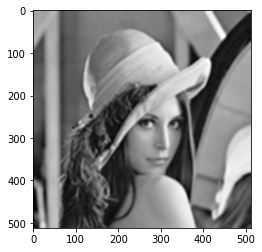

In [7]:
dst = cv2.GaussianBlur(gray_img,(7,7),cv2.BORDER_DEFAULT)
plt.imshow(dst, cmap='gray')

In [8]:

x, y = np.meshgrid(np.linspace(-1,1,10), np.linspace(-1,1,10))
d = np.sqrt(x*x+y*y)
sigma, mu = 7,7
g = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )
print("2D Gaussian-like array:")
print(g.shape)

2D Gaussian-like array:
(10, 10)


In [13]:
g_kernel=cv2.getGaussianKernel(8, 0, cv2.CV_64FC1)
g_kernel.shape

(8, 1)

# References  
https://www.etutorialspoint.com/index.php/306-python-opencv-gaussian-blur-filtering  
https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html  
https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#gac05a120c1ae92a6060dd0db190a61afa  
https://stackoverflow.com/questions/19248926/difference-of-opencv-mat-types  
